# Trabalho Final - Algebra Linear

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import seaborn as sns

## Inicialmente, importando a base de dados e fazendo pequenas análises.

## Criando as funções para a Regressão Logística

### Função sigmóide (logit)

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Função de custo

In [3]:
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 0.00001
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

### Gradiente descendente

In [4]:
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

### Função de predição
    Maior que 0.5 é arredondada p/ 1, menor p/ 0.

In [5]:
def predict(X, params):
    return np.round(sigmoid(X @ params))

## Gera dados fake pra testar se tudo beleza
curiosamente, estava sim

## Transformando os dados
    pd.core.series.Series em np.ndarray

In [6]:
df = pd.read_csv("db_estrelas.csv")

df = df[(df['Spectral Class'] == 'A') | (df['Spectral Class'] == 'F')]
df['Spectral Class'].replace(to_replace='A', value=1, inplace=True)
df['Spectral Class'].replace(to_replace='F', value=0, inplace=True)

# ======================================================== #
# =================== Seleção de Dados =================== #
# ======================================================== #
dados = {
    'X' : ['Temperature (K)', 'Absolute magnitude(Mv)'],
    'y' : 'Spectral Class',
    'normalizada' : False
}
# ======================================================== #


df = df[ dados['X']+[dados['y']] ]
df = df.dropna()

if not dados['normalizada']:
    for col in dados['X']:
        df[[col]] = df[[col]]/df[[col]].mean()

X = df[ dados['X'] ].to_numpy()
y = df[[ dados['y'] ]].to_numpy()
y = np.hstack((y)).T

df.sample(5)

,Temperature (K),Absolute magnitude(Mv),Spectral Class
34,0.629312,0.811538,0
148,0.837961,2.379977,1
39,0.606201,0.808324,0
90,0.575061,0.882247,0
85,1.049757,2.246595,1


Text(0, 0.5, 'Absolute magnitude(Mv)')

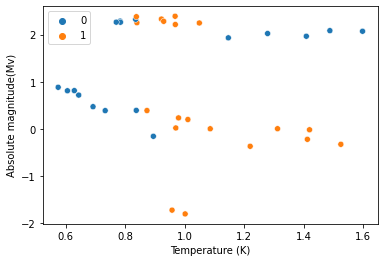

In [9]:

sns.scatterplot(x = X[:,0], y = X[:,1], hue = y.reshape(-1));

# legendas
plt.xlabel(dados['X'][0])
plt.ylabel(dados['X'][1])

In [14]:
y = y.reshape((-1))
m = len(y)

X_new = np.hstack((np.ones((m,1)),X))
n = np.size(X_new,1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(X_new, y, params)
print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(X_new, y, params, learning_rate, iterations)

y_pred = predict(X_new, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(params_optimal)

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

[1 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1]
Initial Cost is: [0.69312718] 



ValueError: could not broadcast input array from shape (36,) into shape (1,)

In [ ]:

y_pred = predict(X_new, params_optimal)
score = float(sum(y_pred == y))/ float(len(y))

print(score)

In [ ]:
slope = -(params_optimal[1] / params_optimal[2])
intercept = -(params_optimal[0] / params_optimal[2])

sns.set_style('white')
sns.scatterplot(x = X_new[:,1], y= X_new[:,2], hue=y.reshape(-1));

ax = plt.gca()
ax.autoscale(False)
x_vals = np.array(ax.get_xlim())
y_vals = intercept + (slope * x_vals)
plt.plot(x_vals, y_vals, c="k");

# legendas
plt.xlabel(cols['x_1'].replace("_", " ").title())
plt.ylabel(cols['x_2'].replace("_", " ").title())